In [2]:
import pandas as pd
df = pd.read_csv("steam_games_simple.csv")
df.head()

,game,developer,price,positive_reviews,negative_reviews,release_year,genre
0,Portal 2,Valve,9.99,500000,10000,2011,Puzzle
1,The Witcher 3,CD Projekt,29.99,700000,20000,2015,RPG
2,Stardew Valley,ConcernedApe,14.99,300000,5000,2016,Simulation
3,CS:GO,Valve,0.00,1000000,50000,2012,Shooter
4,Cyberpunk 2077,CD Projekt,59.99,450000,120000,2020,RPG


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   game              5 non-null      object 
 1   developer         5 non-null      object 
 2   price             5 non-null      float64
 3   positive_reviews  5 non-null      int64  
 4   negative_reviews  5 non-null      int64  
 5   release_year      5 non-null      int64  
 6   genre             5 non-null      object 
dtypes: float64(1), int64(3), object(3)
memory usage: 412.0+ bytes


In [4]:
df.describe()

,price,positive_reviews,negative_reviews,release_year
count,5.000000,5.000000,5.000000,5.000000
mean,22.992000,590000.000000,41000.000000,2014.800000
std,23.342772,270185.121722,47486.840282,3.563706
min,0.000000,300000.000000,5000.000000,2011.000000
25%,9.990000,450000.000000,10000.000000,2012.000000
50%,14.990000,500000.000000,20000.000000,2015.000000
75%,29.990000,700000.000000,50000.000000,2016.000000
max,59.990000,1000000.000000,120000.000000,2020.000000


In [5]:
df[df['positive_reviews'] == df['positive_reviews'].max()]

,game,developer,price,positive_reviews,negative_reviews,release_year,genre
3,CS:GO,Valve,0.0,1000000,50000,2012,Shooter


In [7]:
df['positive_ratio'] = df['positive_reviews'] / (df['negative_reviews'] + 1)

In [8]:
df.sort_values(by='positive_ratio', ascending=False).head(3)

,game,developer,price,positive_reviews,negative_reviews,release_year,genre,positive_ratio
2,Stardew Valley,ConcernedApe,14.99,300000,5000,2016,Simulation,59.988002
0,Portal 2,Valve,9.99,500000,10000,2011,Puzzle,49.995000
1,The Witcher 3,CD Projekt,29.99,700000,20000,2015,RPG,34.998250


In [11]:
df['total_reviews'] = df['positive_reviews'] + df['negative_reviews']
df_filtrado = df[df['total_reviews'] > 1000]
df_filtrado.sort_values(by='positive_ratio', ascending=False).head(3)

,game,developer,price,positive_reviews,negative_reviews,release_year,genre,positive_ratio,total_reviews
2,Stardew Valley,ConcernedApe,14.99,300000,5000,2016,Simulation,59.988002,305000
0,Portal 2,Valve,9.99,500000,10000,2011,Puzzle,49.995000,510000
1,The Witcher 3,CD Projekt,29.99,700000,20000,2015,RPG,34.998250,720000


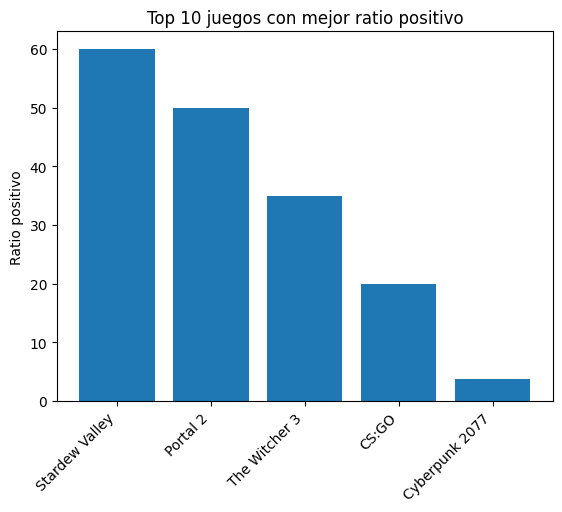

In [14]:
import matplotlib.pyplot as plt

# Gráfico de barras de los 10 juegos con mejor ratio positivo
top10 = df_filtrado.sort_values(by='positive_ratio', ascending=False).head(10)
plt.bar(top10['game'], top10['positive_ratio'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Ratio positivo')
plt.title('Top 10 juegos con mejor ratio positivo')
plt.savefig('top10_juegos_ratio.png')
plt.show()